# Introduction to the Pandas module

.. codeauthor:: Emile Roux emile.roux@univ-smb.fr

.. This notebook is ready for  [RISE](https://damianavila.github.io/RISE/) Slideshow

## Scope
This notebook gives some key functions to work with data base using the panda module (https://pandas.pydata.org/)

The web gives you a lot of exemples and documentations on this module:

http://pandas.pydata.org/pandas-docs/stable/10min.html

http://www.python-simple.com/python-pandas/panda-intro.php

In [1]:
#Setup
%load_ext autoreload
%matplotlib nbagg
%autoreload 2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

### Load data and creat a dataframe from csv file

More explaination can be found here : https://chrisalbon.com/python/data_wrangling/pandas_dataframe_importing_csv/

In [2]:
df = pd.read_csv('./_DATA/Note_csv.csv',delimiter=";")

### Display the dataframe

In [3]:
# return the beginning of the dataframe
df.head() 

section groupe      name    ET     CC
0      MM      A       ami  14.5  11.75
1      MM      A     joyce   8.5  11.50
2      MM      C      lola   9.5  13.25
3      MM      B      irma   7.5   6.00
4     IAI      D  florence  14.5  13.25

In [4]:
# return the end of the dataframe
df.tail() 

section groupe       name     ET     CC
90      MM      A      james  13.75  12.75
91     IAI      D    richard  15.25   7.00
92      MM      A    caprice  18.25  15.00
93     IAI      D         al  12.50   9.75
94      MM      B  constance   3.00   7.00

### Selecting data in a dataframe

In [5]:
 # get data from index 2
df.loc[2]

section       MM
groupe         C
name        lola
ET           9.5
CC         13.25
Name: 2, dtype: object

In [6]:
# get name from index 2
df.name[2] 

'lola'

In [7]:
# Sliccing is also working
df.name[2:6] 

2        lola
3        irma
4    florence
5          vi
Name: name, dtype: object

###  Get one of row of the dataframe

In [8]:
df.name

0             ami
1           joyce
2            lola
3            irma
4        florence
5              vi
6           brian
7      antoinette
8            fred
9          gaston
10         samuel
11         arnaud
12          annie
13      roosevelt
14          sarah
15          simon
16          louis
17             an
18        jacques
19        charles
20         sigrid
21          lasse
22           king
23          marco
24        patrick
25            liv
26          diane
27           bill
28        jessica
29         gilles
         ...     
65        jeannot
66        fernand
67           lise
68         ursula
69           dona
70      dominique
71         platon
72          eugen
73          pedro
74            bob
75        marquis
76          j곩mie
77           karl
78       lucienne
79    timothꥻ4.75
80           avis
81           mari
82           rose
83         porter
84       philippe
85            vin
86       jeunesse
87       victoire
88         joseph
89        

###  Get the number of student in groupe A and B

In [9]:
df.groupe.value_counts()

B    25
A    24
D    23
C    23
Name: groupe, dtype: int64

###  Get the proportion of student between groupe A and B

In [10]:
df.groupe.value_counts(normalize=True)

B    0.263158
A    0.252632
D    0.242105
C    0.242105
Name: groupe, dtype: float64

###  Display the proportion of student between groupe A and B




***Using the plot function of panda:***

visualization optin of pandas can be found here : http://pandas.pydata.org/pandas-docs/version/0.18/visualization.html

<IPython.core.display.Javascript object>


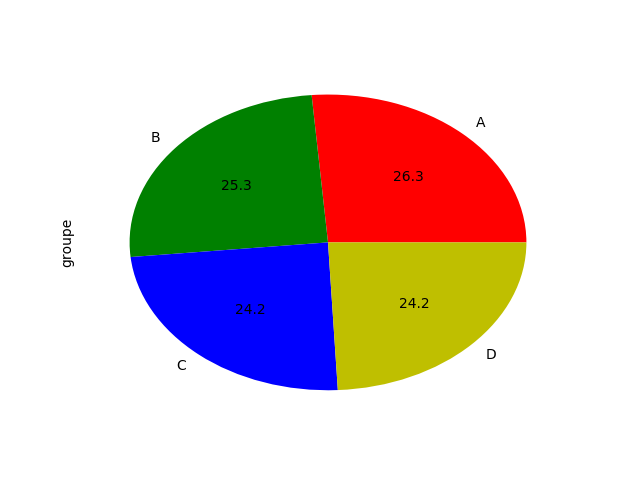

In [11]:
fig = plt.figure()
df.groupe.value_counts(normalize=True).plot.pie(labels=['A', 'B', 'C', 'D'], colors= ['r', 'g', 'b', 'y'], autopct='%.1f')
plt.show() 

***Using the plot function of matplotlib:***

<IPython.core.display.Javascript object>


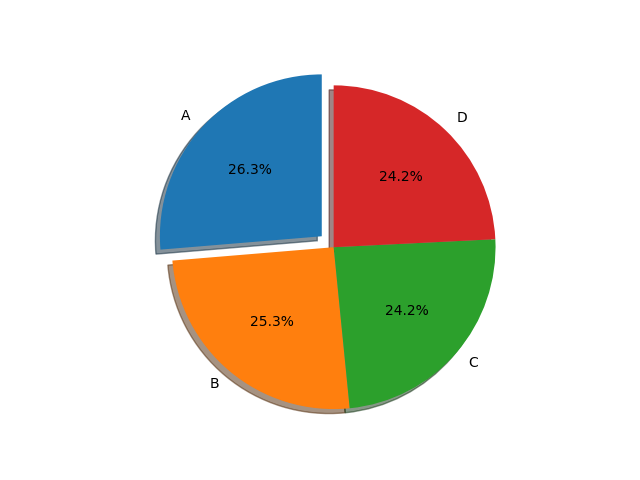

In [12]:
val = df.groupe.value_counts(normalize=True).values
explode = (0.1, 0, 0, 0) 
labels = 'A', 'B', 'C', 'D'
fig1, ax1 = plt.subplots()
ax1.pie(val, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

###  Get student list who are in groupe A

In [13]:
df[df.groupe=="A"]

section groupe       name     ET     CC
0       MM      A        ami  14.50  11.75
1       MM      A      joyce   8.50  11.50
23      MM      A      marco  12.50  13.00
27      MM      A       bill  11.00  12.75
28      MM      A    jessica  16.50  12.50
37      MM      A      denis  13.25  16.00
38      MM      A      jenny  12.75  17.50
40      MM      A  christian  12.50  12.50
43      MM      A       rita  13.75   8.50
44      MM      A    orlando  14.00  15.25
48      MM      A      chant   4.50   9.00
50      MM      A        val  15.00  11.25
53      MM      A        ana  15.00  13.50
59      MM      A   clarisse  12.50  13.50
63      MM      A   isabelle  14.00   7.50
65      MM      A    jeannot  14.75  14.00
66      MM      A    fernand   8.00  10.00
75      MM      A    marquis   8.50  13.00
85      MM      A        vin  11.00  13.00
86      MM      A   jeunesse  12.00  10.50
87      MM      A   victoire  11.75  12.00
89      MM      A        fꭩx  13.00  14.50
90      MM      A      james  13.75  12.75
92      MM      A    caprice  18.25  15.00

###  Make calulation on data

In [14]:
df.ET.mean() # the mean of ET note over all student

11.043010752688172

In [15]:
df.ET[df.groupe=="A"].mean() # the mean of note1 over student from A groupe

12.552083333333334

In [16]:
 df.groupby(['groupe']).mean() # compte the mean of each note for each groupe

ET         CC
groupe                      
A       12.552083  12.531250
B        9.720000  10.093750
C       10.630435  11.913043
D       11.345238   9.076087

In [17]:
 df.groupby(['section']).mean() # compte the mean of each note for each section

ET         CC
section                      
IAI      10.804688   9.786765
MM       11.168033  11.550000

###  Display the notes with a histogram plot


<IPython.core.display.Javascript object>


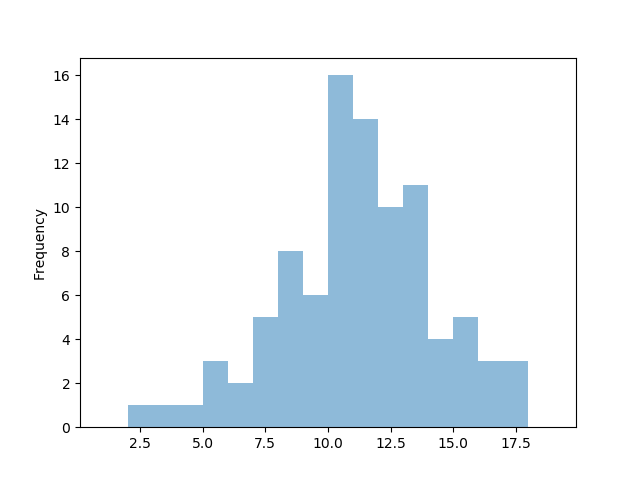

In [18]:
# CC notes
fig = plt.figure()
df.CC.plot.hist(alpha=0.5, bins=np.arange(1,20))
plt.show()

<IPython.core.display.Javascript object>


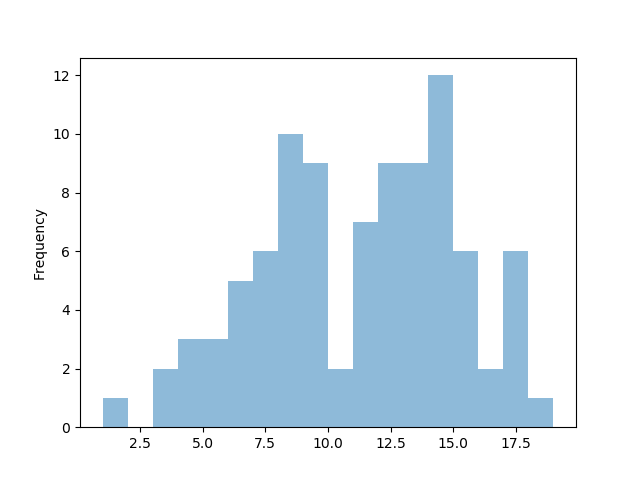

In [19]:
# ET notes
fig = plt.figure()
df.ET.plot.hist(alpha=0.5, bins=np.arange(1,20))
plt.show()

<IPython.core.display.Javascript object>


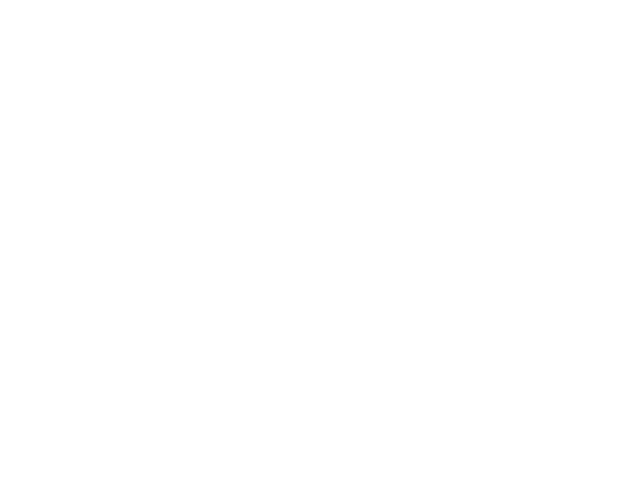

<IPython.core.display.Javascript object>


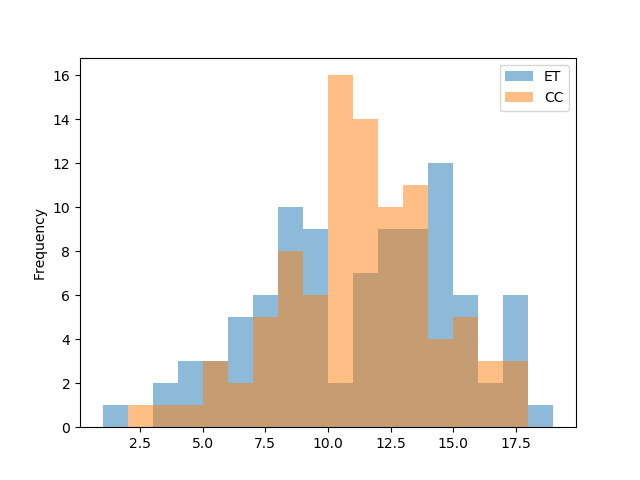

In [20]:
fig = plt.figure()
df.plot.hist(alpha=.5, bins=np.arange(1,20))
plt.show()

## Let's compute the mean of both notes


###  We need first to add a new row to a data frame

In [21]:
df["FinalNote"] = 0.0 # add  row filled with 0.0

In [22]:
df.head()

section groupe      name    ET     CC  FinalNote
0      MM      A       ami  14.5  11.75        0.0
1      MM      A     joyce   8.5  11.50        0.0
2      MM      C      lola   9.5  13.25        0.0
3      MM      B      irma   7.5   6.00        0.0
4     IAI      D  florence  14.5  13.25        0.0

### Let's compute the mean

In [31]:
df["FinalNote"]=df.mean(axis=1) 
# the axis option alows comptuting the mean over lines or rows

In [24]:
df.head()

section groupe      name    ET     CC  FinalNote
0      MM      A       ami  14.5  11.75   8.750000
1      MM      A     joyce   8.5  11.50   6.666667
2      MM      C      lola   9.5  13.25   7.583333
3      MM      B      irma   7.5   6.00   4.500000
4     IAI      D  florence  14.5  13.25   9.250000

<IPython.core.display.Javascript object>


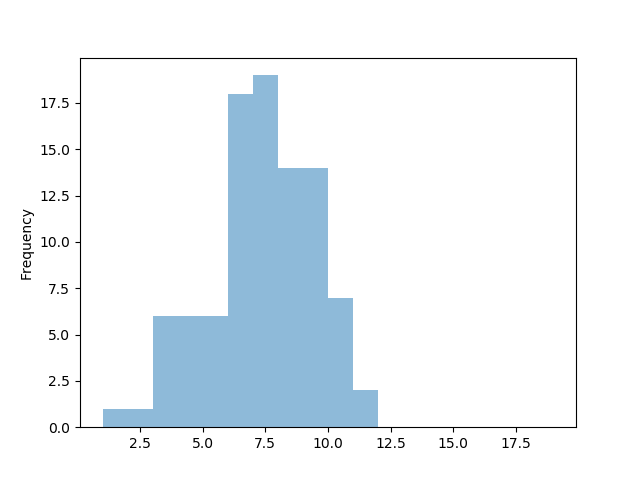

In [25]:
fig = plt.figure()
df.FinalNote.plot.hist(alpha=0.5, bins=np.arange(1,20))
plt.show()

## What is the overall mean ?

In [30]:
df.FinalNote.mean()

10.812762277994366